# Relacion entre Variables
### Actividad de Transferencia

In [1]:
# librerías de análisis
import pandas as pd
import numpy as np


# graficación
import matplotlib.pyplot as plt


# estadística y ML
from scipy.stats import chi2, chi2_contingency
from sklearn.linear_model import LinearRegression


# quitamos las warnings
import warnings
warnings.filterwarnings('ignore')

#### Parte 1: Variables

In [2]:
# Variables cualitativas:
# a) Modo de pago: ['Efectivo', 'Tarjeta', 'Transferencia']
# b) Satisfacción del cliente: ['Alta', 'Media', 'Baja']
# c) Tipo de cliente: ['Frecuente', 'Ocasional']
# d) Región de compra: ['Norte', 'Sur', 'Centro']
# e) Canal de compra: ['Online', 'Presencial']

# Variables cuantitativas:
# a) Frecuencia de compras (número de compras por mes)
# b) Antigüedad del cliente (en meses)
# c) Volumen de ventas (en dólares)
# d) Descuento promedio otorgado (en porcentaje)
# e) Calificación promedio del cliente (en una escala del 1 al 10)

#### Parte 2: Análisis de Contingencia

In [3]:
# creamos el dataframe simulado para el análisis
np.random.seed(27)
data = {
    'CanalCompra': np.random.choice(['Online', 'Presencial'], size=100),
    'SatisfaccionCliente': np.random.choice(['Alta', 'Media', 'Baja'], size=100)
}
df = pd.DataFrame(data)

In [4]:
# creamos la tabla de contingencia
tabla_contingencia = pd.crosstab(df['CanalCompra'], df['SatisfaccionCliente'])

# la mostramos
tabla_contingencia

SatisfaccionCliente,Alta,Baja,Media
CanalCompra,,,
Online,17,16,11
Presencial,20,18,18


In [5]:
# calculamos el valor estadístico de Pearson
chi2_stat, p, dof, expected = chi2_contingency(tabla_contingencia)

# valor crítico para la significancia del 5%
alpha = 0.05
valor_critico = chi2.ppf(1 - alpha, dof)

In [6]:
# Resultados
print("Estadístico de Pearson (X2):", chi2_stat)
print("Valor crítico para significancia del 5%:", valor_critico)
print("Grados de libertad:", dof)
print("p-valor:", p)

Estadístico de Pearson (X2): 0.6194657817375869
Valor crítico para significancia del 5%: 5.991464547107979
Grados de libertad: 2
p-valor: 0.7336428927706078


In [7]:
if chi2_stat > valor_critico:
    print("Conclusión: Las variables son dependientes (rechazamos H0).")
else:
    print("Conclusión: Las variables son independientes (no rechazamos H0).")

Conclusión: Las variables son independientes (no rechazamos H0).


In [8]:
## Respondiendo a las preguntas e y f

# e) si el estadístico de Pearson (X2) fuera 7.4, calcular el p-valor
chi2_stat_e = 7.4
p_valor_e = 1 - chi2.cdf(chi2_stat_e, dof)      # Función de distribución acumulada chi-cuadrado
print(f"Si el estadístico de Pearson (X2) fuera {chi2_stat_e}, el p-valor sería: {p_valor_e}")


# f) si el valor p fuera 0.086, calcular el estadístico de Pearson (X2)
p_valor_f = 0.086
chi2_stat_f = chi2.ppf(1 - p_valor_f, dof)
print(f"Si el valor p fuera {p_valor_f}, el estadístico de Pearson (X2) sería: {chi2_stat_f}")

Si el estadístico de Pearson (X2) fuera 7.4, el p-valor sería: 0.024723526470339374
Si el valor p fuera 0.086, el estadístico de Pearson (X2) sería: 4.906815965457259


#### Parte 3: Análisis de Regresión Lineal

Para que el conjunto de datos mantenga su caracter aleatorio, pero siga una tendencia razonablemente lineal. Se creó de esta forma; adempas, asi se podrían comparar los resultados obtenidos con el modelo con algo real.

In [9]:
# creamos el dataframe simulado para la regresión
np.random.seed(27)

# parametros de al recta
m = 30      # pendiente
b = 100     # intersección

# variable independiente
frecuenciaCompras = np.random.randint(1,30, size=100)

# datos correspondientes a la variable dependiente
volumenVentas = m*frecuenciaCompras + b

# agregamos ruido aleatorio para que los puntos se separen de la recta
ruido = np.random.normal(0, 100, size=100)
volumenVentas = volumenVentas + ruido

# agregamos la data al dataframe
regressionData = {
    'FrecuenciaCompras': frecuenciaCompras,
    'VolumenVentas': volumenVentas
}
regdf = pd.DataFrame(regressionData)

In [10]:
# definir variables explicativa y explicada
X = regdf[['FrecuenciaCompras']]
y = regdf['VolumenVentas']

In [11]:
# creamos y ajustamos el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [12]:
# coeficiente de determinación
r_squared = model.score(X,y)

# covarianza
covarianza = np.cov(regdf['FrecuenciaCompras'], regdf['VolumenVentas'])[0, 1]

# coeficientes de la recta
alfa = model.intercept_
beta = model.coef_[0]

In [13]:
# resultados
print("Coeficiente de determinación (R^2):", r_squared)
print("Covarianza:", covarianza)
print("Alfa (intercepto):", alfa)
print("Beta (pendiente):", beta)


Coeficiente de determinación (R^2): 0.8797886762130954
Covarianza: 2004.6095733949855
Alfa (intercepto): 127.66491146409845
Beta (pendiente): 29.017310076280932


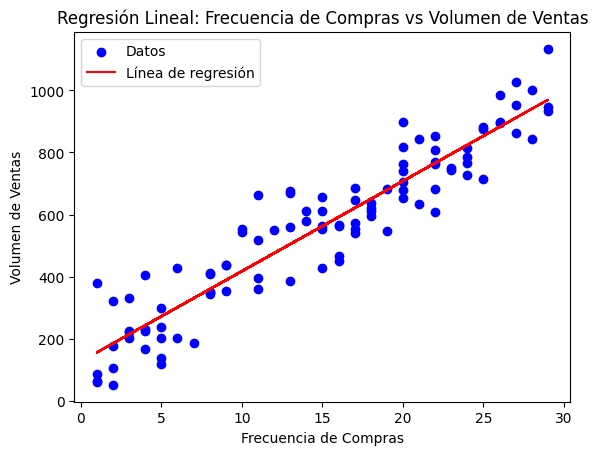

In [17]:
# gráfica de regresión
plt.scatter(X, y, color='blue', label='Datos')
plt.plot(X, model.predict(X), color='red', label='Línea de regresión')
plt.xlabel('Frecuencia de Compras')
plt.ylabel('Volumen de Ventas')
plt.title('Regresión Lineal: Frecuencia de Compras vs Volumen de Ventas')
plt.legend()
plt.savefig('LR2.png', transparent=True)
plt.show()

In [15]:
# Evaluación del modelo
if r_squared > 0.5:
    print("El modelo lineal es razonablemente bueno para explicar la relación.")
else:
    print("El modelo lineal no es suficientemente bueno para explicar la relación.")

El modelo lineal es razonablemente bueno para explicar la relación.
